In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


In [1]:
# Load libraries
from pandas import read_csv
import pandas as pd
import ipaddress
import keras
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
...

Ellipsis

In [2]:
...
# Load dataset
import csv
path = r"C:\Users\15853\Downloads\deNAT_labeled_26Mar2020_partitioned_to_share.csv"
datapath= open(path, 'r')
data = read_csv(datapath, delimiter=",")
data.pop('type')
data.pop('date')
data.pop('IP')
label=data.pop('category')
print(data.shape)
print(data[:3])

D:\ML\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1565286, 20)
   FIRST_SWITCHED  IN_BYTES  IN_PKTS   IPV4_DST_ADDR  L4_DST_PORT  \
0    1.579047e+09     240.0      4.0     52.9.239.18       5222.0   
1    1.579047e+09      76.0      1.0  203.95.213.129        123.0   
2    1.579047e+09     120.0      2.0   54.177.192.42       5222.0   

   L4_SRC_PORT  LAST_SWITCHED  PROTOCOL  SRC_TOS  TCP_FLAGS  DURATION  \
0       3696.0   1.579043e+09       6.0      0.0        2.0    4195.0   
1       4039.0   1.579043e+09      17.0      0.0        0.0    4216.0   
2       3661.0   1.579043e+09       6.0      0.0        2.0    4213.0   

               device_model partition  SRC_AS  DST_AS  INPUT_SNMP  \
0  webcam.Samsung.SNH-1011N  training     0.0     0.0         6.0   
1  webcam.Samsung.SNH-1011N  training     0.0     0.0         6.0   
2  webcam.Samsung.SNH-1011N  training     0.0     0.0         6.0   

   OUTPUT_SNMP  IPV4_SRC_ADDR                MAC  inter_arrival_time  
0          1.0  192.168.1.227  00:16:6C:7F:82:21        1.579048e+09

In [3]:
label

0          IoT
1          IoT
2          IoT
3          IoT
4          IoT
          ... 
1565281    IoT
1565282    IoT
1565283    IoT
1565284    IoT
1565285    IoT
Name: category, Length: 1565286, dtype: object

In [4]:
print(data.head(20))

    FIRST_SWITCHED  IN_BYTES  IN_PKTS    IPV4_DST_ADDR  L4_DST_PORT  \
0     1.579047e+09     240.0      4.0      52.9.239.18       5222.0   
1     1.579047e+09      76.0      1.0   203.95.213.129        123.0   
2     1.579047e+09     120.0      2.0    54.177.192.42       5222.0   
3     1.579047e+09      76.0      1.0   192.36.143.130        123.0   
4     1.579047e+09      60.0      1.0    54.177.192.42       5222.0   
5     1.579047e+09     240.0      4.0      52.9.31.103       5222.0   
6     1.579047e+09      76.0      1.0    193.29.63.150        123.0   
7     1.579047e+09     120.0      2.0       52.8.43.71       5222.0   
8     1.579047e+09      76.0      1.0      129.6.15.30        123.0   
9     1.579047e+09      60.0      1.0       52.8.43.71       5222.0   
10    1.579047e+09     120.0      2.0      52.9.31.103       5222.0   
11    1.579047e+09      76.0      1.0  162.159.200.123        123.0   
12    1.579047e+09      60.0      1.0      52.9.31.103       5222.0   
13    

In [5]:
print(data.describe())

       FIRST_SWITCHED      IN_BYTES       IN_PKTS   L4_DST_PORT   L4_SRC_PORT  \
count    1.565286e+06  1.565286e+06  1.565286e+06  1.565286e+06  1.565286e+06   
mean     1.580598e+09  7.226326e+02  5.067918e+00  8.129631e+03  3.162837e+04   
std      9.330934e+05  7.530315e+03  4.991111e+01  1.265576e+04  2.247024e+04   
min      1.579047e+09  3.200000e+01  1.000000e+00  8.000000e+01  0.000000e+00   
25%      1.579780e+09  7.600000e+01  1.000000e+00  1.230000e+02  3.934000e+03   
50%      1.580555e+09  1.800000e+02  2.000000e+00  5.222000e+03  3.912500e+04   
75%      1.581424e+09  9.750000e+02  6.000000e+00  8.800000e+03  5.150500e+04   
max      1.582243e+09  2.842771e+06  2.298500e+04  6.384400e+04  6.553500e+04   

       LAST_SWITCHED      PROTOCOL       SRC_TOS     TCP_FLAGS      DURATION  \
count   1.565286e+06  1.565286e+06  1.565286e+06  1.565286e+06  1.565286e+06   
mean    1.580594e+09  1.085487e+01  8.829972e+00  7.226753e+00  4.224581e+03   
std     9.330848e+05  5.507342

In [6]:
data.iloc[:2,:]

,FIRST_SWITCHED,IN_BYTES,IN_PKTS,IPV4_DST_ADDR,L4_DST_PORT,L4_SRC_PORT,LAST_SWITCHED,PROTOCOL,SRC_TOS,TCP_FLAGS,DURATION,device_model,partition,SRC_AS,DST_AS,INPUT_SNMP,OUTPUT_SNMP,IPV4_SRC_ADDR,MAC,inter_arrival_time
0,1.579047e+09,240.0,4.0,52.9.239.18,5222.0,3696.0,1.579043e+09,6.0,0.0,2.0,4195.0,webcam.Samsung.SNH-1011N,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,1.579048e+09
1,1.579047e+09,76.0,1.0,203.95.213.129,123.0,4039.0,1.579043e+09,17.0,0.0,0.0,4216.0,webcam.Samsung.SNH-1011N,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,2.100000e+01


In [7]:
# Convert String to Numeric
def demo(clm):
  le.fit(clm)
  ans=le.transform(clm)
 # data.append(ans, ignore_index=True)
  print(ans)


In [8]:
## Function for converting Ip-Address to Integer 
def ip2int(ip):
    res = 0
    for j, i in enumerate(ip.split('.')[::-1]):
        res += 256**j*int(i)
    return res

In [9]:
le=preprocessing.LabelEncoder()

In [10]:
lis=[]
for row in data.itertuples(index=True, name='IPV4_DST_ADDR'):
    ip=ip2int(((getattr(row, "IPV4_DST_ADDR"))))
    lis.append(ip)
len(lis)
ips=pd.Series(lis)
data['IPV4_DST_ADDR']=ips

In [11]:
le.fit(data.IP)
mac=le.transform(data.IP)
ips=pd.Series(mac)
data['IP']=ips

AttributeError: 'DataFrame' object has no attribute 'IP'

array([0, 0])

arr=["IPV4_DST_ADDR","IP","IPV4_SRC_ADDR","MAC"]
for x in arr:
 lis=[]
 for row in data.itertuples(index=True, name=x):
    ip=ip2int(((getattr(row, x ))))
    lis.append(ip)
#len(lis)
    ips=pd.Series(lis)
    data[x]=ips


In [17]:
a=data.iloc[:,3]
demo(a)
demo(data.iloc[:,10])
#demo(a)


[1136 7768 5318 ... 1413 1413 1413]
[24 45 42 ... 69 70 69]


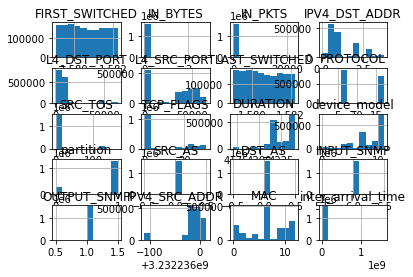

In [22]:
data.hist()
pyplot.show()

In [23]:
le.fit(label)
Y=le.transform(label)

In [24]:
# Split-out validation dataset

X = data.copy()
le.fit(label)
Y=le.transform(label)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)


In [ ]:
...
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))#Navie
models.append(('SVM', SVC(gamma='auto')))##SVM
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.890609 (0.000449)
LDA: 0.988691 (0.000336)
KNN: 0.996081 (0.000173)
CART: 0.999999 (0.000002)
NB: 0.900453 (0.000728)


In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');